<a href="https://colab.research.google.com/github/Jenn-mawia/Soccer-Outcome-Prediction/blob/master/Soccer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Football Match Results Prediction**

# Defining the question

>You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

>Predict the result of a game between two teams 1, and 2 respectively based on who's home and who's away, and whether or not the game is friendly. The model should also include the ranks of both teams 

## Specifying the question

>There are two approaches to this question:
- Polynomial approach
 - predict the number of goals the home team scores
 - predict the number of goals the away team scores
- Logistic approach
 - figure out from the home's perspective if the game is a Win, Loss or Draw (W, L, D)

## Defining the metrics of success

This project will be a success if the models created are able to predict the outcome of a game played with minimum overfitting and underfitting

## Understanding the context

>It has been the order of the day to try and know before hand the results/outcome of a football match. This is usually done by looking at factors such as the respective ranks for both teams, their previous and total points accumulated over the years, the weather conditions during the time of play, home and away records(soccer teams tend to perform better at home). 

>Ranking of teams began in 1992, therefore matches that were played before 1992 did not have ranks assigned to the teams. 
Another important thing to note is that neutral grounds mean that both teams played away(none of the teams played as home team).


## Experimental design

The following is the order in which I went about this project:

- Data sourcing & understanding
- Checking the data (shape, number of records, datatypes)
- Data cleaning procedures (handling null values, duplicates entries, outliers, anomalies)
- Exploratory data analysis (Univariate, Bivariate analyses)
- Implementing the solution
 - Building the models
    - Polynomial approach
    - Logistic approach
  -Cross-validating the models
  - Residuals & heteroskedasticity test
  - Hyperparameter tuning using RandomSearchCV method
- Challenging the solution
-Follow up questions

## Data Relevance

The data available for this project is relevant to the needs of predicting the outcome of a soccer match. The data comprises two datasets which can be downloaded on this [link](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc). One of the datasets contains results from matches i.e. the scores for both teams after a match, while the other dataset contains the ranks of these teams, year of ranking and other information that helps during ranking such as weighted points of a team over 1, 2, 3 years

These fields are appropriate and will influence the outcome of the project

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the data

In [ ]:
# loading the datasets
results = pd.read_csv("results.csv")
fifa_ranking = pd.read_csv("fifa_ranking.csv")

# Checking the data

**Results dataset**

In [ ]:
# number of records in the data
results.shape

(40839, 9)

In [ ]:
# preview the top of the dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# preview the bottom of dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# checking the whether each column has appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

>date column needs to be changed to datetime datatype

**Fifa-ranking dataset**

In [ ]:
# number of records in the data
fifa_ranking.shape

(57793, 16)

In [ ]:
# preview the top of the dataset
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# preview the bottom of the dataset
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
# checking the datatypes of the respective columns
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

>The rank date column also needs to be changed to appropriate datatype

# Data Cleaning

**Data Type conversion**

In [ ]:
# change the date column in both dataframes to appropriate datatype
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])
results['date'] = pd.to_datetime(results['date'])

**Null Values**

In [ ]:
# check for null values in both dataframes
print(fifa_ranking.isnull().any().sum())

print(results.isnull().any().sum())

# both datasets do not have null values

0
0


**Duplicates**

In [ ]:
print("Number of duplicated entries:" + str(fifa_ranking.duplicated().sum()))
fifa_ranking.shape

Number of duplicated entries:37


(57793, 16)

In [ ]:
fifa_ranking.drop_duplicates(keep="first", inplace=True)
fifa_ranking.shape

(57756, 16)

In [ ]:
results.duplicated().sum()
# the results dataframe does not have any duplicated entries

0

In [ ]:
# extract the month and year from the date column to make it easier during merge
fifa_ranking['year'] = fifa_ranking['rank_date'].dt.strftime('%B-%Y')
fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,August-1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,August-1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,August-1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,August-1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,August-1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,June-2018
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,June-2018
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,June-2018
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,June-2018


In [ ]:
results['year'] = results['date'].dt.strftime('%B-%Y')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,November-1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,March-1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,March-1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,March-1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,March-1876
...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,July-2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,July-2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,July-2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,July-2019


>In a football match, neutral means a match was played on neither of the teams' grounds. i.e. no team was playing as home team. It is best to remain with only games played where neutral is not true. 

In [ ]:
# drop rows where neutral is equal true
results = results.drop(results[(results['neutral'] == True)].index)

results['neutral'].unique()

array([False])

>Another new column needs to be created having the status of each game played as either Win, Loss or Draw. 

In [ ]:
# create a new empty column named status in the results dataframe
results['status'] = results.apply(lambda _: '', axis=1)

In [ ]:
# create a list of conditions to use to fill the empty column
conditions_list = [results['home_score'] > results['away_score'], 
                   results['home_score'] < results['away_score'], 
                   results['home_score'] == results['away_score']]

# assign each condition with respective value as a list

value_list = ['Win', 'Loss', 'Draw']

# fill the empty column with respective values
results['status'] = np.select(conditions_list, value_list)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,November-1872,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,March-1873,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,March-1874,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,March-1875,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,March-1876,Win


**Obtaining the ranks for home and away teams**

In [ ]:
# merge the two dataframes on team name and date to obtain the ranks for home team
home_rank = pd.merge(results, fifa_ranking, how='inner', right_on=["country_full", "year"], left_on=['home_team', 'year'])


# change rank column name to home team rank
home_rank.rename(columns={'rank': 'home_rank'}, inplace=True)

# drop unnecessary columns
home_rank = home_rank.drop(['country_full', 'country_abrv', 'confederation', 'rank_date', 'date','city', 'country'], 1)
home_rank.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,status,home_rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,August-1993,Draw,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,August-1993,Win,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,August-1993,Win,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Peru,Argentina,0,1,FIFA World Cup qualification,False,August-1993,Loss,70,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peru,Colombia,0,1,FIFA World Cup qualification,False,August-1993,Loss,70,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
away_rank = pd.merge(results, fifa_ranking, how='inner', right_on=["country_full", "year"], left_on=['away_team', 'year'])


# change rank column name to away team rank
away_rank.rename(columns={'rank': 'away_rank'}, inplace=True)

# drop unnecessary columns
away_rank = away_rank.drop(['country_full', 'country_abrv', 'confederation', 'rank_date', 'date','city', 'country'], 1)
away_rank.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,status,away_rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,August-1993,Draw,67,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,August-1993,Draw,67,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Peru,Argentina,0,1,FIFA World Cup qualification,False,August-1993,Loss,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,August-1993,Loss,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Colombia,Argentina,2,1,FIFA World Cup qualification,False,August-1993,Win,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# merge the two dataframes onto one
data = pd.merge(home_rank, away_rank, left_on = ['home_team', 'away_team', 'year'],
                 right_on = ['home_team', 'away_team', 'year'], how = 'inner')

data.head()

,home_team,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,status_x,home_rank,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,home_score_y,away_score_y,tournament_y,neutral_y,status_y,away_rank,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,August-1993,Draw,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,FIFA World Cup qualification,False,Draw,67,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,August-1993,Win,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,FIFA World Cup qualification,False,Win,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,August-1993,Win,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,FIFA World Cup qualification,False,Win,70,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Peru,Argentina,0,1,FIFA World Cup qualification,False,August-1993,Loss,70,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,FIFA World Cup qualification,False,Loss,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peru,Colombia,0,1,FIFA World Cup qualification,False,August-1993,Loss,70,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,FIFA World Cup qualification,False,Loss,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# drop redundant columns that occur after merge
data = data.drop(['home_score_x', 'away_score_x','tournament_x', 'neutral_x', 'status_x',
                 'total_points_x', 'previous_points_x', 'rank_change_x', 'cur_year_avg_x', 
                 'cur_year_avg_weighted_x', 'last_year_avg_x', 'last_year_avg_weighted_x', 
                 'two_year_ago_avg_x', 'two_year_ago_weighted_x', 'three_year_ago_avg_x', 
                 'three_year_ago_weighted_x'], 1)
data.head()

,home_team,away_team,year,home_rank,home_score_y,away_score_y,tournament_y,neutral_y,status_y,away_rank,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y
0,Colombia,Paraguay,August-1993,19,0,0,FIFA World Cup qualification,False,Draw,67,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Colombia,Argentina,August-1993,19,2,1,FIFA World Cup qualification,False,Win,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Colombia,Peru,August-1993,19,4,0,FIFA World Cup qualification,False,Win,70,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Peru,Argentina,August-1993,70,0,1,FIFA World Cup qualification,False,Loss,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peru,Colombia,August-1993,70,0,1,FIFA World Cup qualification,False,Loss,19,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
'''
def tourn(values):
  index = 0
  for x in values:
    if x == 'FIFA World Cup':
      values[index] = 'World Cup'
    elif x != 'Friendly':
      values[index] = 'Other'

    index = index + 1

  return values

df2 = tourn(df['tournament'].unique())
# away_rank['tournament'].unique()
'''

"\ndef tourn(values):\n  index = 0\n  for x in values:\n    if x == 'FIFA World Cup':\n      values[index] = 'World Cup'\n    elif x != 'Friendly':\n      values[index] = 'Other'\n\n    index = index + 1\n\n  return values\n\ndf2 = tourn(df['tournament'].unique())\n# away_rank['tournament'].unique()\n"

In [ ]:
# check for any null values
data.isnull().sum()

home_team                    0
away_team                    0
year                         0
home_rank                    0
home_score_y                 0
away_score_y                 0
tournament_y                 0
neutral_y                    0
status_y                     0
away_rank                    0
total_points_y               0
previous_points_y            0
rank_change_y                0
cur_year_avg_y               0
cur_year_avg_weighted_y      0
last_year_avg_y              0
last_year_avg_weighted_y     0
two_year_ago_avg_y           0
two_year_ago_weighted_y      0
three_year_ago_avg_y         0
three_year_ago_weighted_y    0
dtype: int64

In [ ]:
# check for any duplicated entries in the away rank dataframe
print(f"Number of records with duplicates: {data.shape}")
print(f"Duplicated entries: {data.duplicated().sum()}")

print("..................")
# drop duplicates while keeping the first entry
data = data.drop_duplicates(keep='first')
print(f"Number of records without duplicates: {data.shape}")
print(f"Duplicate entries: {data.duplicated().sum()}")

Number of records with duplicates: (13516, 21)
Duplicated entries: 625
..................
Number of records without duplicates: (12891, 21)
Duplicate entries: 0


**Outliers**

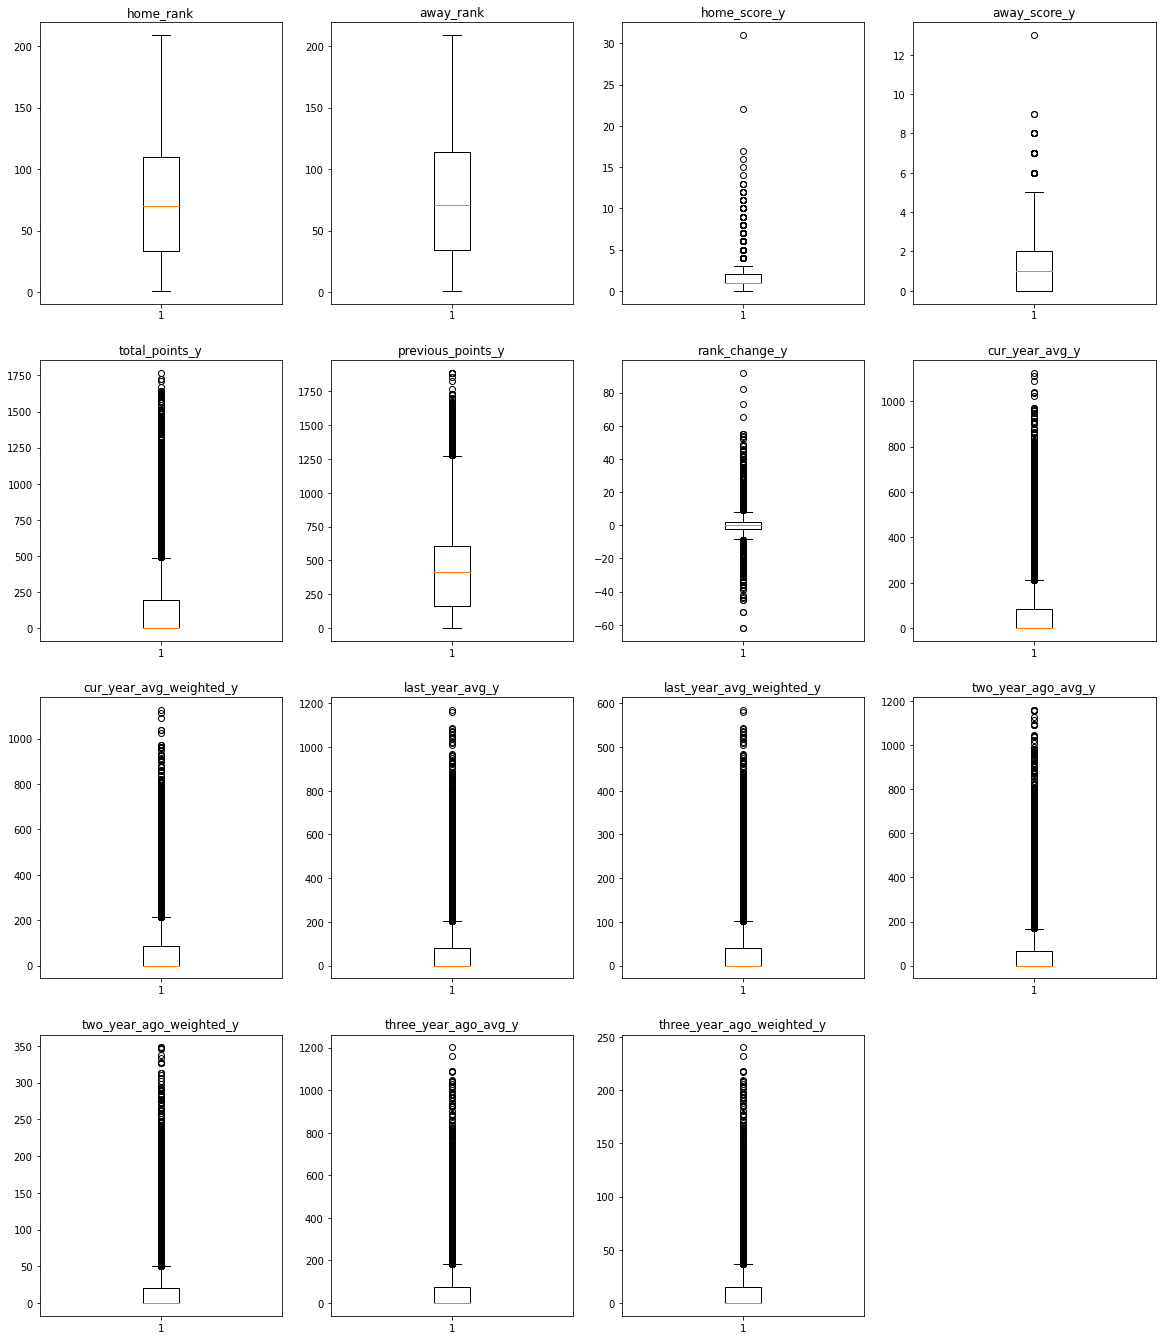

In [ ]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'home_rank':1, 'away_rank': 2, 'home_score_y': 3, 'away_score_y': 4, 
                'total_points_y':5, 'previous_points_y':6, 'rank_change_y':7,'cur_year_avg_y':8, 
                'cur_year_avg_weighted_y':9, 'last_year_avg_y':10,'last_year_avg_weighted_y':11,
                'two_year_ago_avg_y':12, 'two_year_ago_weighted_y':13,'three_year_ago_avg_y':14, 
                'three_year_ago_weighted_y':15}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

In [ ]:
# dealing with outliers

print(f"Size of dataset with outliers: {data.shape}")
# dealing with outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("...................")

print(f"Size of dataset after removal of outliers: {data.shape}")

Size of dataset with outliers: (12891, 21)
...................
Size of dataset after removal of outliers: (7541, 21)


**Anomalies**

In [ ]:
# checking for anomalies
# calculate the interquartile range using pandas
Q1 = data['home_score_y'].quantile(0.25)
Q3 = data['home_score_y'].quantile(0.75)
IQR = Q3 - Q1

# calculate the interquartile range using numpy
iqr1 = np.quantile(data['home_score_y'], .25)
iqr3 = np.quantile(data['home_score_y'], .75)
IQR2 = iqr3 - iqr1

# compare the two values
print(IQR, IQR2)

2.0 2.0


# Exploratory Data Analysis(EDA)

## **Univariate Analysis**

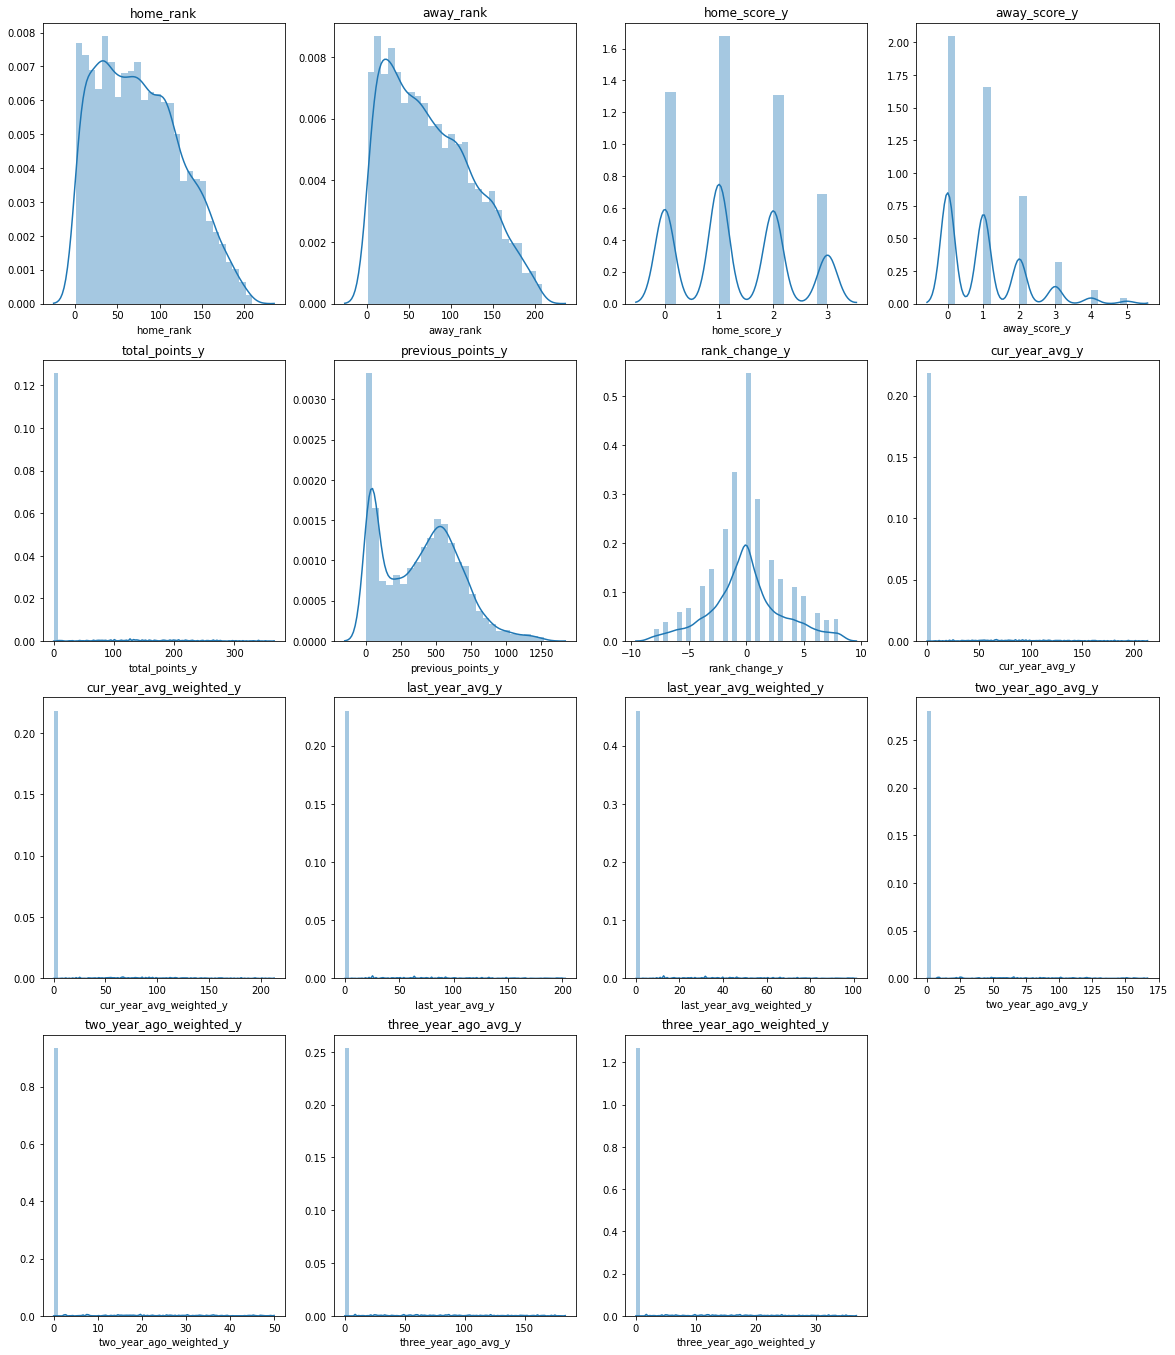

In [ ]:
# plot histograms for all numeric columns
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(data[variable])
  plt.title(variable)

plt.show()

In [ ]:
# statistical description of the data
data.describe()

,home_rank,home_score_y,away_score_y,away_rank,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y
count,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000
mean,76.946294,1.269593,0.981170,75.725103,12.897979,390.415595,0.012863,6.916494,6.916494,6.447758,3.223904,5.291217,1.587378,5.851209,1.170263
std,48.972072,1.001254,1.077705,51.161648,49.645123,278.260403,3.157236,28.363868,28.363868,27.235844,13.617958,22.907445,6.872291,24.716003,4.943284
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,32.000000,0.000000,108.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,1.000000,1.000000,68.000000,0.000000,409.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.000000,2.000000,2.000000,113.000000,0.000000,591.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,209.000000,3.000000,5.000000,209.000000,366.400000,1272.000000,8.000000,212.930000,212.930000,202.580000,101.290000,166.690000,50.010000,183.740000,36.750000


## **Bivariate Analysis**

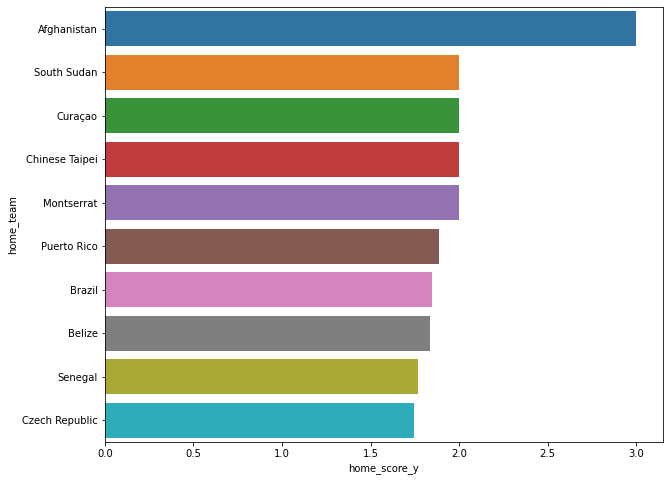

In [ ]:
# which teams have the highest mean scores while playing home
home_scores = data.groupby('home_team')['home_score_y'].mean().reset_index().sort_values('home_score_y', ascending = False)
home_scores

plt.figure(figsize=(10,8))
ax= sns.barplot("home_score_y","home_team",data=home_scores[:10])

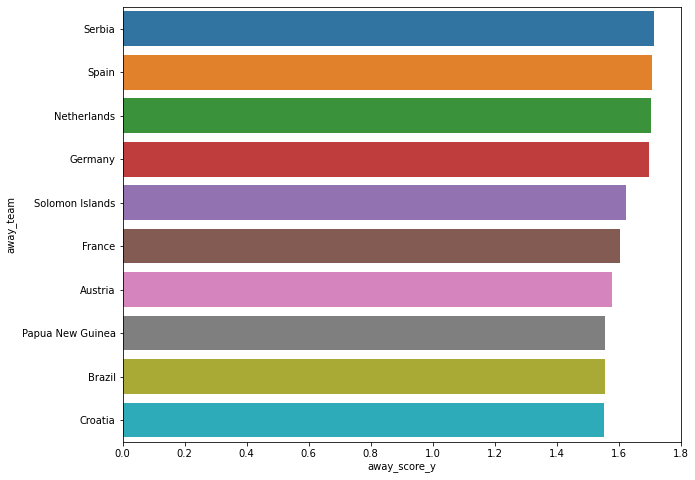

In [ ]:
# which teams have the highest mean scores while playing away
away_scores = data.groupby('away_team')['away_score_y'].mean().reset_index().sort_values('away_score_y', ascending = False)
away_scores

plt.figure(figsize=(10,8))
ax= sns.barplot("away_score_y","away_team",data=away_scores[:10])

>Afghanistan does so well when playing on home grounds while Serbia does well when playing as an away team.

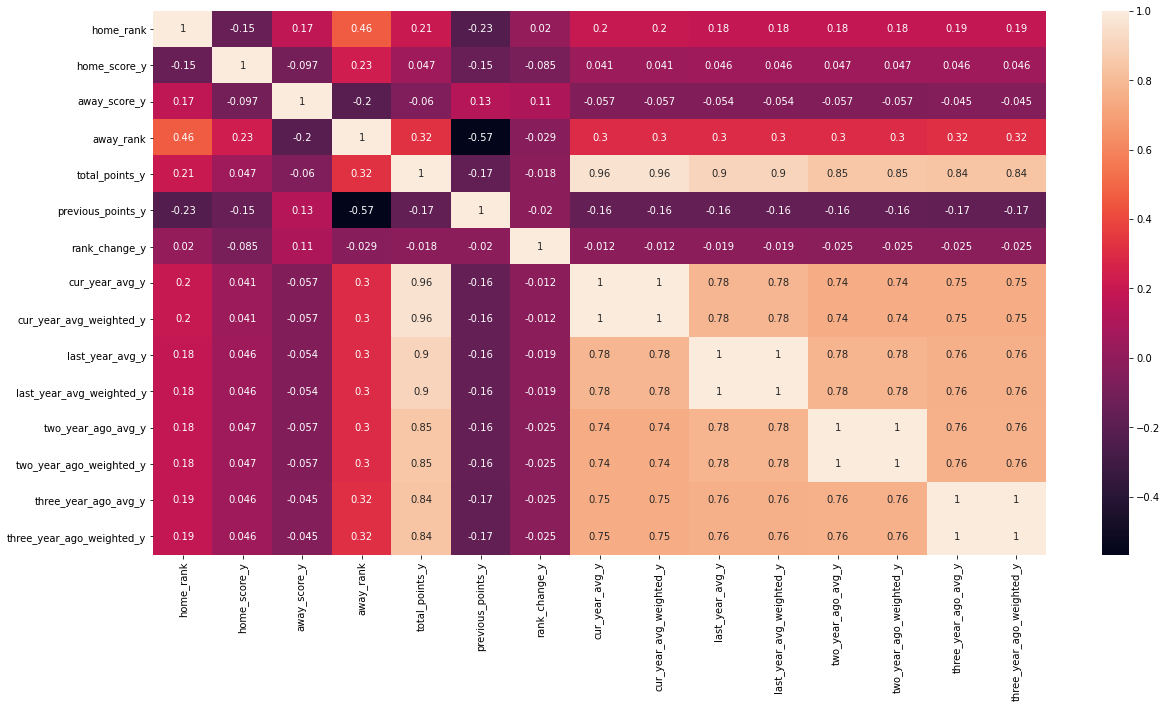

In [ ]:
# check the correlations of the columns

# drop unnecessary column in the plot
needed = data.drop('neutral_y', 1)

plt.figure(figsize=(20,10))
sns.heatmap(needed.corr(), annot=True)

>There is a huge correlation between the total_points and the last 8 columns. This is not desirable during modelling and will need to be dropped.

>There is also a high correlation between home_rank and away_rank

>There is a negative correlation between away rank and previous points

# Implementing the solution

## **Approach 1: Polynomial Regression**

**Feature engineering**

In [ ]:
# use labelencoder to transform the tournament column values to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['tournament_y'] = le.fit_transform(data['tournament_y'])
data.head()


,home_team,away_team,year,home_rank,home_score_y,away_score_y,tournament_y,neutral_y,status_y,away_rank,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y
0,Colombia,Paraguay,August-1993,19,0,0,24,False,Draw,67,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Colombia,Argentina,August-1993,19,2,1,24,False,Win,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Peru,Argentina,August-1993,70,0,1,24,False,Loss,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Uruguay,Brazil,August-1993,22,1,1,24,False,Draw,8,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Venezuela,Brazil,August-1993,94,1,5,24,False,Loss,8,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# use labelencoder to transform the status column values to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['status_y'] = le.fit_transform(data['status_y'])
data.head()


,home_team,away_team,year,home_rank,home_score_y,away_score_y,tournament_y,neutral_y,status_y,away_rank,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y
0,Colombia,Paraguay,August-1993,19,0,0,24,False,0,67,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Colombia,Argentina,August-1993,19,2,1,24,False,2,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Peru,Argentina,August-1993,70,0,1,24,False,1,5,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Uruguay,Brazil,August-1993,22,1,1,24,False,0,8,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Venezuela,Brazil,August-1993,94,1,5,24,False,1,8,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# drop unnecessary columns that will not be used in modelling. 
# These are mainly dependent variables that were highly correlated as seen in the correlation heatmap
poly = data.drop(['neutral_y', 'year', 'home_team', 'away_team', 'cur_year_avg_y', 
                  'cur_year_avg_weighted_y', 'last_year_avg_y', 'last_year_avg_weighted_y', 
                  'two_year_ago_avg_y', 'two_year_ago_weighted_y', 'three_year_ago_avg_y', 
                  'three_year_ago_weighted_y', 'total_points_y', 'previous_points_y', 'rank_change_y'], 1)
poly.head()

,home_rank,home_score_y,away_score_y,tournament_y,status_y,away_rank
0,19,0,0,24,0,67
1,19,2,1,24,2,5
3,70,0,1,24,1,5
6,22,1,1,24,0,8
8,94,1,5,24,1,8


### **Model 1: Predict how many goals the home team scores.**

In [ ]:
# display the correlations between the variables
correlations = poly.drop(['home_score_y', 'away_score_y', 'status_y'], 1).corr()

correlations

,home_rank,tournament_y,away_rank
home_rank,1.000000,-0.182159,0.462359
tournament_y,-0.182159,1.000000,-0.197423
away_rank,0.462359,-0.197423,1.000000


In [ ]:
# use the correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_rank,tournament_y,away_rank
home_rank,1.285959,0.121606,-0.570567
tournament_y,0.121606,1.052056,0.151474
away_rank,-0.570567,0.151474,1.293712


>The VIF Scores for each variable read alongside the downwards sloping diagonal are all significantly low suggesting that the variables are not colinear.

In [ ]:
# feature selection 
X = poly[['home_rank', 'away_rank', 'tournament_y']].values #features
y = poly['home_score_y'].values #labels


In [ ]:
# normalize the data by standardizing/scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features

from sklearn.model_selection import train_test_split
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import PolynomialFeatures
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_train, X_test = poly_reg.fit_transform(X_train), poly_reg.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
# train model/fit train set onto the model
pol_regressor = LinearRegression()
pol_regressor.fit(X_train, y_train)

# predict using trained model
y_pred = pol_regressor.predict(X_test)

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.head(10)

,Actual,Predicted
0,1,1.268939
1,3,1.108038
2,1,1.112816
3,3,1.516196
4,1,1.208211
5,1,1.253644
6,1,2.008678
7,2,1.290229
8,0,1.745705
9,0,1.268672


***Evaluating the model***

In [ ]:
poly.describe()

,home_rank,home_score_y,away_score_y,tournament_y,status_y,away_rank
count,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000
mean,76.946294,1.269593,0.981170,25.288291,1.188702,75.725103
std,48.972072,1.001254,1.077705,11.265056,0.836064,51.161648
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,0.000000,0.000000,24.000000,0.000000,32.000000
50%,73.000000,1.000000,1.000000,25.000000,1.000000,68.000000
75%,112.000000,2.000000,2.000000,25.000000,2.000000,113.000000
max,209.000000,3.000000,5.000000,56.000000,2.000000,209.000000


In [ ]:
# import metrics library
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7790677830795896
Mean Squared Error: 0.8721623339346418
Root Mean Squared Error: 0.9338963186214205


>The root mean squared error is quite high, comparing it with 10% of the mean value of home score. The algorithm is not very accurate but can still make fair predictions. This may have been attributed by poor feature selection. The features used do not have a high enough correlation to the values being predicted as seen on the correlation heatmap.

<font color='green'>*Cross-Validation*

In [ ]:
# import LeaveOneOut library
from sklearn.model_selection import LeaveOneOut

# define the kfolds for validation by calling LeaveOneOut function
folds = LeaveOneOut()

# number of folds set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the models based on the folds created.
RMSES = [] # this array keeps track of the RSME of each model
count = 0 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  poly_reg = PolynomialFeatures(degree = 2) 
  X_train, X_test = poly_reg.fit_transform(X_train), poly_reg.fit_transform(X_test)

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
print(f"The mean RMSES of the trained models is: {np.mean(RMSES)}")


we are using 7541 folds
trained 7541 models
The mean RMSES of the trained models is: 0.7766847480405453


>The mean RMSES of the trained models is lower than the initally trained model. It would be challenging to create a model that beats the ~0.78 mean RMSE using this dataset. This is extremely time consuming especially in this case as the data is relatively large.

<font color='green'>*Residuals*

In [ ]:
# create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# describe our residual:
pd.DataFrame(residuals).describe()

# residuals.mean()

NameError: ignored

>The mean is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances. This can be thoroughly investigated using the heteroskedasticity test

<font color='green'>*Heteroskedasticity test*

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
print(test_result, p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!...There are no patterns to the variance of the data')



nan nan
nan
the variances are homogeneous!...There are no patterns to the variance of the data


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


### **Model 2: Predict how many goals the away team scores.**

In [ ]:
# feature selection 
X = poly[['home_rank', 'away_rank', 'tournament_y']].values #features
y = poly['away_score_y'].values #labels

# normalize the data by standardizing/scaling
X = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import PolynomialFeatures
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2, include_bias=False) 
X_train, X_test = poly_reg.fit_transform(X_train), poly_reg.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
# train model/fit train set onto the model
pol_regressor = LinearRegression()
pol_regressor.fit(X_train, y_train)

# predict using trained model
y_pred = pol_regressor.predict(X_test)

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.head(10)


,Actual,Predicted
0,1,0.935286
1,2,1.301006
2,0,1.129373
3,1,0.805597
4,2,1.079833
5,2,1.014931
6,0,0.287746
7,1,0.820855
8,0,0.502463
9,0,0.819938


**Evaluating the model**

In [ ]:
poly.describe()

,home_rank,home_score_y,away_score_y,tournament_y,status_y,away_rank
count,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000
mean,76.946294,1.269593,0.981170,25.288291,1.188702,75.725103
std,48.972072,1.001254,1.077705,11.265056,0.836064,51.161648
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,0.000000,0.000000,24.000000,0.000000,32.000000
50%,73.000000,1.000000,1.000000,25.000000,1.000000,68.000000
75%,112.000000,2.000000,2.000000,25.000000,2.000000,113.000000
max,209.000000,3.000000,5.000000,56.000000,2.000000,209.000000


In [ ]:
# print metrics summaries of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7773801350416831
Mean Squared Error: 0.9933284987525564
Root Mean Squared Error: 0.9966586671235826


>The root mean squared error is quite high, comparing it with 10% of the mean value of away score which is 0.981. The algorithm is not very accurate but can still make fair predictions. This needs to be cross-validated using the kfold method.

<font color = 'green'>Cross-Validation

In [ ]:
# define the kfolds for validation by calling LeaveOneOut function
folds = LeaveOneOut()

# number of folds set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the models based on the folds created.
RMSES = [] # this array keeps track of the RSME of each model
count = 0 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  poly_reg = PolynomialFeatures(degree = 2) 
  X_train, X_test = poly_reg.fit_transform(X_train), poly_reg.fit_transform(X_test)

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
print(f"The mean RMSES of the trained models is: {np.mean(RMSES)}")


we are using 7541 folds
trained 7541 models
The mean RMSES of the trained models is: 0.783979394433433


>The mean RMSES drops by a significant value.



In [ ]:
# create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# describe our residual:
pd.DataFrame(residuals).describe()

# residuals.mean()

,0
count,1.000000
mean,0.633687
std,NaN
min,0.633687
25%,0.633687
50%,0.633687
75%,0.633687
max,0.633687


>The residuals mean is close to 0(centered around the mean), indicating that we tend to be fairly correct, although slightly over estimating chances. This can be thoroughly investigated using the heteroskedasticity test

<font color='green'>Heteroskedasticity test

In [ ]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
print(test_result, p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!...There are no patterns to the variance of the data')



nan nan
nan
the variances are homogeneous!...There are no patterns to the variance of the data


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


## **Approach 2: Logistic approach**

<font color='green'>Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

>Initially, we encoded the status column to numeric which resulted in Draw = 0, Loss = 1, Win = 2

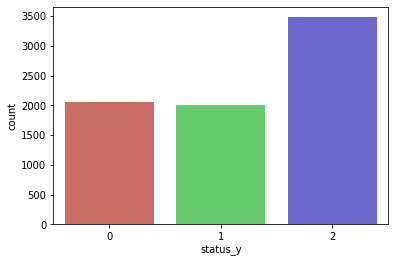

In [ ]:
# Checking that our target variable is binary
# Since we are building a model to predict status of a game played target will be "status" variable. 

# make a countplot to see the distribution 
sns.countplot(x='status_y',data=data, palette='hls')


In [ ]:
# select promising columns
log_data = data[['home_score_y', 'away_score_y', 'home_rank', 'away_rank', 'tournament_y', 'previous_points_y','total_points_y', 'status_y']]
log_data.head()

,home_score_y,away_score_y,home_rank,away_rank,tournament_y,previous_points_y,total_points_y,status_y
0,0,0,19,67,24,22,0.0,0
1,2,1,19,5,24,51,0.0,2
3,0,1,70,5,24,51,0.0,1
6,1,1,22,8,24,55,0.0,0
8,1,5,94,8,24,55,0.0,1


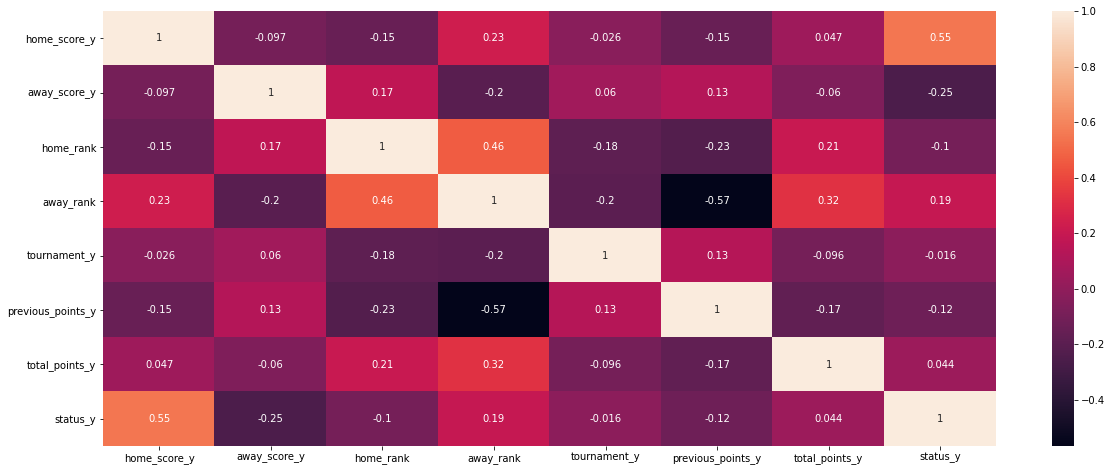

In [ ]:
# Checking for independence between features
plt.figure(figsize=(20,8))
sns.heatmap(log_data.corr(), annot=True)  

>There is a high correlation between the status and home score. This is because I derived the Status column based on the home team's perspective. Howover, it is the label and will not be included in the feature set which is okay. 

>There is also a high correlation between previous points and away rank, therefore, I will remove the previous points column from the features

>There is also a notable slight correlation between the home team rank and away team rank.

In [ ]:
log_data = log_data.drop('previous_points_y', 1)
log_data.head()

,home_score_y,away_score_y,home_rank,away_rank,tournament_y,total_points_y,status_y
0,0,0,19,67,24,0.0,0
1,2,1,19,5,24,0.0,2
3,0,1,70,5,24,0.0,1
6,1,1,22,8,24,0.0,0
8,1,5,94,8,24,0.0,1


In [ ]:
# defining features and label sets
X = log_data.drop('status_y', 1).values
y = log_data['status_y'].values

# feature scaling
X = StandardScaler().fit_transform(X)

# split data into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# import library
from sklearn.linear_model import LogisticRegression

# Fitting our model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# predicting
y_pred = LogReg.predict(X_test)

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.head(10)

,Actual,Predicted
0,0,0
1,2,2
2,2,2
3,2,2
4,1,1
5,1,1
6,2,2
7,2,2
8,0,0
9,0,0


**Evaluating the model**

In [ ]:
# Evaluating the model

# get the confusion matrix showing the number of predicted model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# get accuracy of the model 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model: ', accuracy)

[[416   0   0]
 [  0 393   0]
 [  0   0 700]]
Accuracy of the model:  1.0


>The results from the confusion matrix tell us that the total number of correct prediction is 1509, with 0 incorrect predictions. This is a case of overfitting which requires further investigation

<font color = 'green'>Hyperparameter Tuning using RandomSearchCV

In [ ]:
# defining features and label sets
X = log_data.drop('status_y', 1).values
y = log_data['status_y'].values

# Scaling features
X = StandardScaler().fit_transform(X)

# split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training and Cross Validation
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

# The cross_val_score returns the accuracy for all the folds.
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

# Printing the accuracies returned for 10 folds 
print(all_accuracies.mean())

0.9998341625207298


>The mean accuracies for the 10 kfolds is 0.99983 which is very close to the initial accuracy of 1.0

In [ ]:
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object  

from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 10)

# Calling the fit method
random_sr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
# Checking the parameters that return the highest accuracy
best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 5}


In [ ]:
# Finding the obtained accuracy
best_result = random_sr.best_score_
print(best_result)


1.0


>The accuracy obtained is also 1.0 similar to what was obtained inititally.

# Challenging the solution

>The Logistic approach looks promising compared to the polynomial approach since it had a high accuracy score and predicted all values correct. However, this is a case of overfitting and should be investigated more through cross-validation. 






# Follow up questions

## a). Did we have the right data?

>Yes, the data available was appropriate for the research question that was stated. 

## b). Do we need other data to answer our question?

>It would be desirable if more variables were added. This would improve the predictive level of our model especially if some factors such as quality of quaterbacks, quality of other players, weather conditions during the match, injuries and suspensions of team players

## c). Did we have the right question?

>The research question was specific and appropriate for our needs and data available